<a href="https://colab.research.google.com/github/nerdishhomosapein/sign-board/blob/master/TextDetectionAndRecognitionWebcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/argman/EAST.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [0]:
project_name

In [0]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  

pretrained_model = 'east_icdar2015_resnet_v1_50_rbox'
if not exists(pretrained_model):
  # download the pretrained model
  pretrained_model_file_name = 'east_icdar2015_resnet_v1_50_rbox.zip'
  download_from_google_drive('0B3APw5BZJ67ETHNPaU9xUkVoV0U', pretrained_model_file_name)
  !unzip $pretrained_model_file_name

In [0]:
project_name

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='prateek_LiarPoker.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to prateek_LiarPoker.jpg


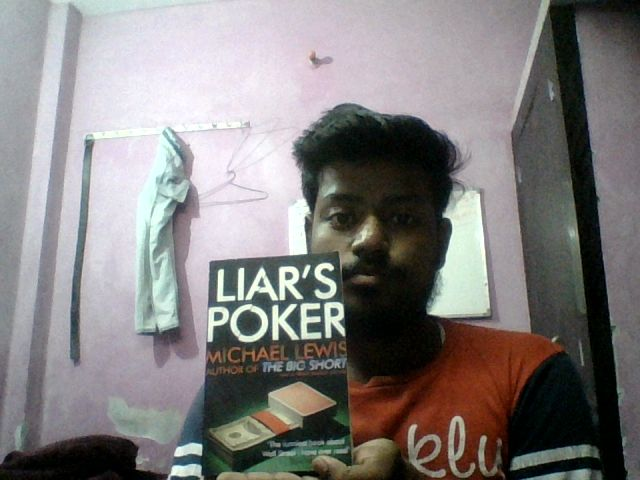

In [127]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/webcam_images/prateek_BlackSwan.jpg')
orig = img.copy()

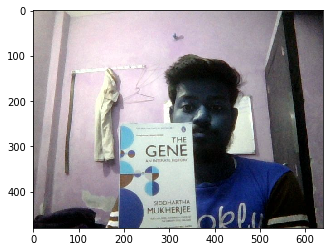

In [129]:
plt.imshow(img)

In [0]:
!mkdir -p webcam_images/output

In [136]:
download_dir= '/content/webcam_images'
!cd $project_name && python eval.py --test_data_path=$download_dir --gpu_list=0 --checkpoint_path=../$pretrained_model/ --output_dir=/content/webcam_images/output

make: Entering directory '/content/EAST/lanms'
make: 'adaptor.so' is up to date.
make: Leaving directory '/content/EAST/lanms'
resnet_v1_50/block1 (?, ?, ?, 256)
resnet_v1_50/block2 (?, ?, ?, 512)
resnet_v1_50/block3 (?, ?, ?, 1024)
resnet_v1_50/block4 (?, ?, ?, 2048)
Shape of f_0 (?, ?, ?, 2048)
Shape of f_1 (?, ?, ?, 512)
Shape of f_2 (?, ?, ?, 256)
Shape of f_3 (?, ?, ?, 64)
Shape of h_0 (?, ?, ?, 2048), g_0 (?, ?, ?, 2048)
Shape of h_1 (?, ?, ?, 128), g_1 (?, ?, ?, 128)
Shape of h_2 (?, ?, ?, 64), g_2 (?, ?, ?, 64)
Shape of h_3 (?, ?, ?, 32), g_3 (?, ?, ?, 32)
2019-11-25 20:00:19.491384: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Restore from ../east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491
Find 3 images
182 text boxes before nms
/content/webcam_images/prateek_BlackSwan.jpg : net 2098ms, restore 1ms, nms 2ms
[timing] 2.1027305126190186
397 text boxes before nms
/content/webcam

In [0]:
from os import listdir
def list_files1(directory, extension):
    return (f for f in listdir(directory) if f.endswith('.' + extension))

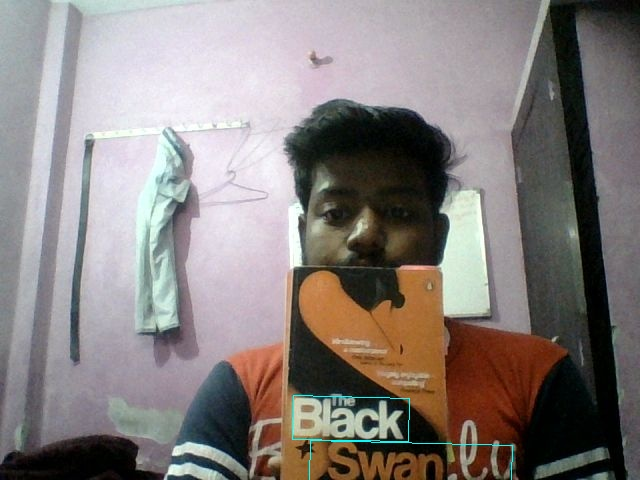

In [150]:
import cv2
img = cv2.imread('/content/webcam_images/output/prateek_BlackSwan.jpg',cv2.IMREAD_COLOR)
cv2_imshow(img)

In [154]:
from google.colab.patches import cv2_imshow
bboxes = []
with open('/content/webcam_images/output/prateek_BlackSwan.txt','r') as f:
  lines = f.readlines()
  for line in lines:
    line = line.strip('\n')
    coord = line.split(',')
    startY = min(coord[1],coord[3],coord[5],coord[7])
    endY = max(coord[1],coord[3],coord[5],coord[7])
    startX = min(coord[0],coord[2],coord[4],coord[6])
    endX = max(coord[0],coord[2],coord[4],coord[6])
    bboxes.append((startY,endY, startX,endX))

len(bboxes)

2

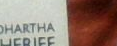

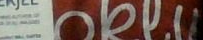

In [155]:
for i,box in enumerate(bboxes):
  y1,y2,x1,x2 = box
  data = orig[int(y1):int(y2), int(x1):int(x2)]
  cv2_imshow(data)
  print('\t')

In [0]:
import sys
from PIL import Image
for i,box in enumerate(bboxes):
  y1,y2,x1,x2 = box
  data = orig[int(y1):int(y2), int(x1):int(x2)]
  new_im = Image.fromarray(data)
  new_im.save('img'+str(i)+'.png')



In [0]:
!git clone https://github.com/MaybeShewill-CV/CRNN_Tensorflow.git

In [0]:
%cd CRNN_Tensorflow/

In [0]:
!pip install -r requirements.txt

In [0]:
%cd CRNN_Tensorflow/


In [119]:
!python /content/CRNN_Tensorflow/tools/test_shadownet.py --image_path /content/img5.png --weights_path /content/CRNN_Tensorflow/model/shadownet.ckpt --char_dict_path /content/CRNN_Tensorflow/data/char_dict/char_dict_en.json --ord_map_dict_path /content/CRNN_Tensorflow/data/char_dict/ord_map_en.json


I1125 19:43:12.527471 7576 utils.py:141] NumExpr defaulting to 2 threads.
2019-11-25 19:43:13.720607: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
INFO:tensorflow:Restoring parameters from /content/CRNN_Tensorflow/model/shadownet.ckpt
I1125 19:43:13.725672 7576 tf_logging.py:115] Restoring parameters from /content/CRNN_Tensorflow/model/shadownet.ckpt
I1125 19:43:13.980219 7576 test_shadownet.py:136] Predict image img5.png result: wy


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip /content/drive/'My Drive'/model.zip 

In [0]:
!ls -l model/ 

In [0]:
!python tools/test_shadownet.py --image_path /content/CRNN_Tensorflow/data/test_images/test_02.jpg --weights_path ./model/shadownet.ckpt --char_dict_path /content/CRNN_Tensorflow/data/char_dict/char_dict_en.json --ord_map_dict_path /content/CRNN_Tensorflow/data/char_dict/ord_map_en.json